### Assignment 2
----
COMP 7745 Machine Learning <br><br>
Univerity of Memphis <br>
Fall 2022 <br>

@author <br>
Bereket Kebede <br>

----


## Support Vector Machines for Facial Emotion Recognition

Load data

**Import libraries**

In [1]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123

# **Load Data and Plot Samples**

In [2]:
TRAIN_DIR = ('Training/Training/')
TEST_DIR = ('Testing/Testing/')

In [3]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [4]:
IMG_SIZE= (48, 48)

In [5]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:20<00:00, 13.37s/it]


28273 images loaded from Training/Training/ directory.


In [6]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [7]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:20<00:00,  3.48s/it]

7067 images loaded from Testing/Testing/ directory.


In [10]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

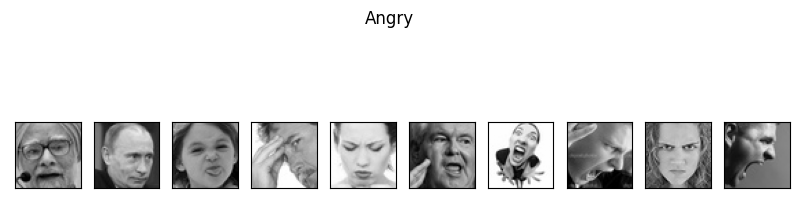

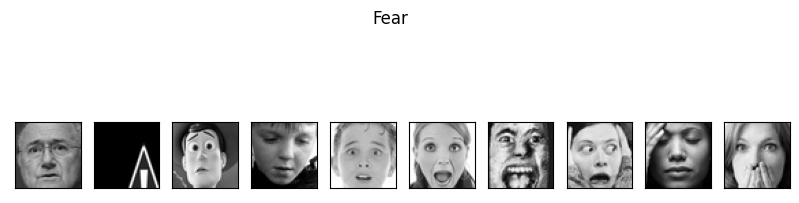

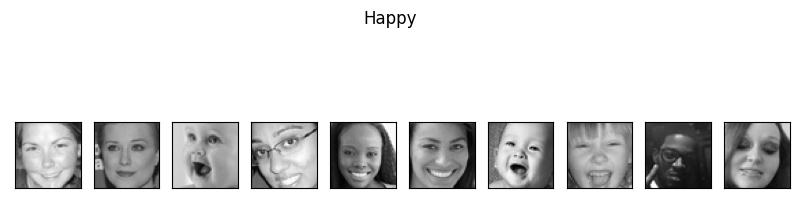

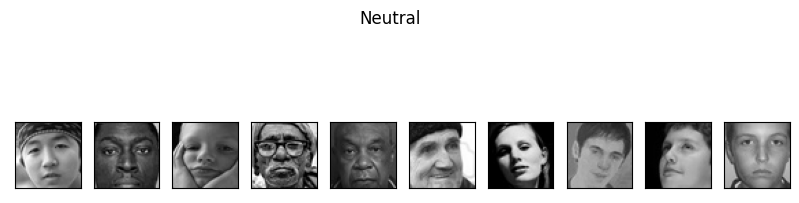

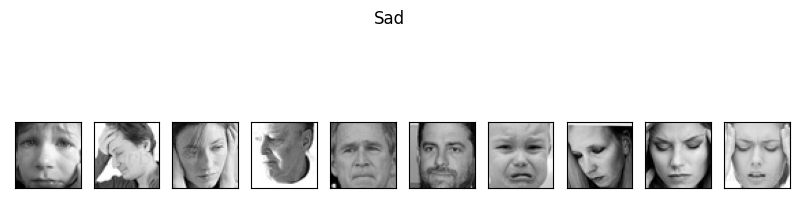

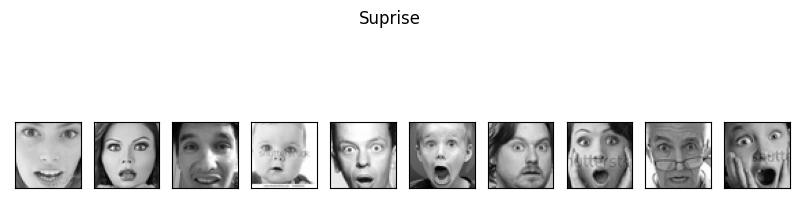

In [11]:
plot_samples(X_train, y_train, train_labels, 10)

**Encoding Classes**

Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [12]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=6)
Y_train.shape

(28273, 6)

In [13]:
Y_test = to_categorical(y_test, num_classes=6)
Y_test.shape

(7067, 6)

In [14]:
from sklearn import svm

In [35]:
X_train.shape

(28273, 48, 48, 3)

In [44]:
X_test.shape

(7067, 48, 48, 3)

In [45]:
X_train_new = X_train[:,:,:,0]
X_test_new = X_test[:,:,:,0]

In [48]:
nsamples, nx, ny,v = X_train.shape
X_train_newer = X_train_new.reshape((nsamples,nx*ny))

In [49]:
nsamples, nx, ny,v = X_test.shape
X_test_newer = X_test_new.reshape((nsamples,nx*ny))

In [50]:
X_train_newer.shape

(28273, 2304)

In [51]:
X_test_newer.shape

(7067, 2304)

In [43]:
#becarefuk not to re-run

clf = svm.SVC()
clf.fit(X_train_newer, y_train)

SVC()

In [52]:
y_pred = clf.predict(X_test_newer)

In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45266732701287676


#### Reference

https://www.kaggle.com/code/basel99/facial-recognition